In [4]:
import flair
import torch
import pandas as pd
import time
from IPython.display import Audio
sound_file = 'http://www.brainybetty.com/FacebookFans/Feb112010/cello.wav'
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
flair.device = torch.device('cuda') 
torch.cuda.is_available()

2020-08-11 18:22:53,077 loading file /home/ai/.flair/models/sentiment-en-mix-distillbert.pt


In [7]:
s = flair.data.Sentence("Note, these commands do not need to be re-run every time you generate a new plot, just once at the beginning of your notebook or whenever style changes are desired after that.")
flair_sentiment.predict(s)
total_sentiment = s.labels
list(total_sentiment)


0.007673740386962891

In [45]:
df = pd.read_excel('./Relatas_ML_Assignment/interactions.xlsx')


In [46]:
df['check'] = df['toEmailId'].str.split('@',expand= True)[1]

In [47]:
ds_backup = df.query('check != "piedpiper.com"' ).reset_index()

In [16]:
ds = df.query('check != "piedpiper.com"' ).reset_index()

In [20]:
def sentiment(x):
    x = flair.data.Sentence(x)
    flair_sentiment.predict(x)
    a,b = str(x.labels[0]).split('(')
    b  = float(b.split(')')[0])
    a  = str(a).strip()
    return a,b

In [23]:
a = time.time()
ds['sentiment'], ds['conf']= zip(*ds['Extracted Interaction Text'].map(sentiment))
time.time() - a
Audio(sound_file, autoplay=True)

941.4473056793213

In [52]:
ds['InteractionDate']  = ds_backup['InteractionDate'].astype(str)

In [54]:
ds.to_excel(r'./sentiment.xlsx', index = False)

In [55]:
ds['InteractionDate']  = ds_backup['InteractionDate']

In [70]:
ds.loc[ds.sentiment == 'POSITIVE', 'positive'] = 1
ds['positive'] = ds['positive'].fillna(0)
ds.loc[ds.sentiment == 'NEGATIVE', 'negative'] = 1
ds['negative'] = ds['negative'].fillna(0)

In [75]:
date_sentiment_monthly_pos = ds.set_index('InteractionDate').resample('M')['positive'].sum()
date_sentiment_monthly_neg = ds.set_index('InteractionDate').resample('M')['negative'].sum()

<AxesSubplot:xlabel='InteractionDate'>

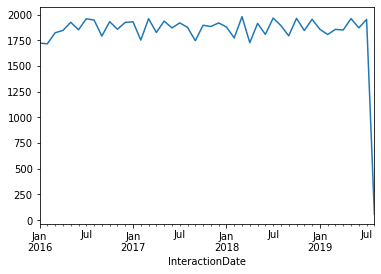

In [78]:
date_sentiment_monthly_pos.plot()

<AxesSubplot:xlabel='InteractionDate'>

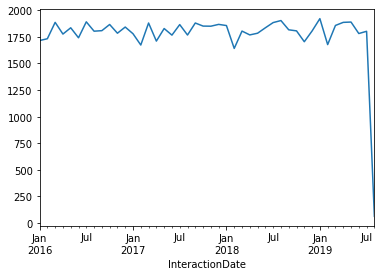

In [79]:
date_sentiment_monthly_neg.plot()

In [80]:
date_sentiment_monthly_neg.sum()

77876.0

In [81]:
date_sentiment_monthly_pos.sum()

80512.0